# BASIC

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [4]:
# Load the dataset
file_path = '/Users/veronicangelin/Downloads/DSA4262/cleaned_data.csv'
df = pd.read_csv(file_path)

In [5]:
# Separate features and target
X = df.drop(columns=['PCOS (Y/N)'])  # Drop target variable from features
y = df['PCOS (Y/N)']

# Handle categorical variables if any
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to numerical

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# Define and train Gaussian Process Classifier with RBF kernel
kernel = 1.0 * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
gpc.fit(X_train, y_train)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=42)

In [8]:
# Predict on the test set
y_pred = gpc.predict(X_test)
y_prob = gpc.predict_proba(X_test)[:, 1]  # Probability estimates for AUC-ROC

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')
print('Classification Report:\n', report)

Accuracy: 0.8962
Precision: 0.8621
Recall: 0.7812
F1 Score: 0.8197
AUC-ROC: 0.9578
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        74
           1       0.86      0.78      0.82        32

    accuracy                           0.90       106
   macro avg       0.89      0.86      0.87       106
weighted avg       0.89      0.90      0.89       106



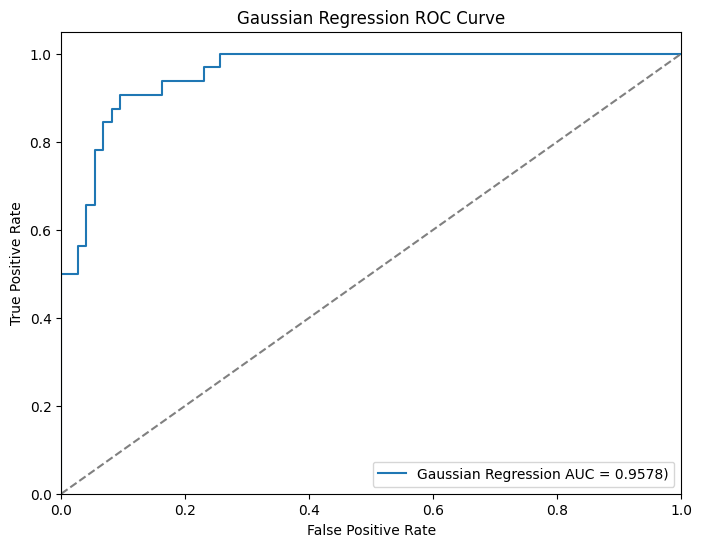

In [16]:
# Plot AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Gaussian Regression AUC = {auc_roc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

# GridSearch, Feature Selection, SMOTE

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_selection import SelectKBest, f_classif


In [56]:
# Load the dataset
file_path = '/Users/veronicangelin/Downloads/DSA4262/cleaned_data.csv'
df = pd.read_csv(file_path)

In [57]:
# Separate features and target
X = df.drop(columns=['PCOS (Y/N)'])  # Drop target variable from features
y = df['PCOS (Y/N)']

# Handle categorical variables if any
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to numerical

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [59]:
# Hyperparameter tuning for length_scale
# Hyperparameter tuning for different kernels
param_grid = {
    'kernel': [
        1.0 * RBF(length_scale=l) for l in [0.025, 0.05, 0.08, 0.1, 0.5]
    ] + [
        1.0 * Matern(length_scale=l, nu=1.5) for l in [0.025, 0.05, 0.08, 0.1, 0.5]
    ] + [
        1.0 * RationalQuadratic(length_scale=l, alpha=1.0) for l in [0.025, 0.05, 0.08, 0.1, 0.5]
    ]
}

gpc = GridSearchCV(GaussianProcessClassifier(random_state=42, warm_start=True), param_grid, cv=5, scoring='roc_auc')
gpc.fit(X_train, y_train)

# Best model selection
gpc_best = gpc.best_estimator_

# Predict on the test set
y_pred = gpc_best.predict(X_test)
y_prob = gpc_best.predict_proba(X_test)[:, 1]  # Probability estimates for AUC-ROC

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/gaussian_process/_gpc.py:456: RuntimeWarning: overflow encountered in exp
  - np.log1p(np.exp(-(self.y_train_ * 2 - 1) * f)).sum()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/gaussian_process/_gpc.py:462: RuntimeWarning: invalid value encountered in scalar subtract
  if lml - log_marginal_likelihood < 1e-10:
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close

In [60]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
report = classification_report(y_test, y_pred)

# Print results
print(f'Best Kernel: {gpc.best_params_}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')
print('Classification Report:\n', report)

Best Kernel: {'kernel': 1**2 * RationalQuadratic(alpha=1, length_scale=0.08)}
Accuracy: 0.8962
Precision: 0.8621
Recall: 0.7812
F1 Score: 0.8197
AUC-ROC: 0.9578
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        74
           1       0.86      0.78      0.82        32

    accuracy                           0.90       106
   macro avg       0.89      0.86      0.87       106
weighted avg       0.89      0.90      0.89       106



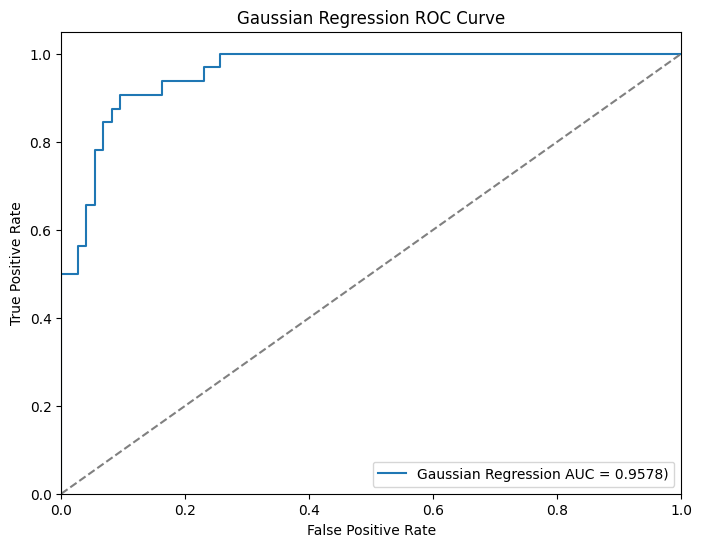

In [61]:
# Plot AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Gaussian Regression AUC = {auc_roc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()